### **1. Imports**

In [91]:
!pip install PyPDF2

In [92]:
import PyPDF2 
from PyPDF2 import PdfFileReader
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### **2. Read our document**

Lets read our pdf for the manifesto using the `PdfFileReader()` function from the PyPDF2 which is a package for extracting document information such as **title, author, number of pages,....**, spliting documents page by page, merging page by page, etc. 

In [93]:
filename = '2022-May-CE245.pdf'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)


To get the document informtion  ussing the `getDocumentInfo()` function and check the number of pages in our document using the `numPages()` function. There are various useful functions one can use to check other things. See online documentation:[PyPDF2](https://pythonhosted.org/PyPDF2/index.html)

In [94]:
ind_manifesto.getDocumentInfo()

{'/Title': 'CHAROTAR UNIVERSITY OF SCIENCE & TECHNOLOGY CHANGA',
 '/Author': 'ECC',
 '/Creator': 'Microsoft® Word 2016',
 '/CreationDate': "D:20220507133605+05'30'",
 '/ModDate': "D:20220507133605+05'30'",
 '/Producer': 'Microsoft® Word 2016'}

In [95]:
total_pages = ind_manifesto.numPages
total_pages

4

From the outputs of our two previous codes, we got the **title** of the document, what OS was used to type the document, when the document was created and modified. And we also got the total number of pages in our document. 

### **3. Lets extract the texts from the pdf file and print it**

We will use a `textract` package to extract our texts from the document.

In [96]:
!pip install textract

In [97]:
import textract   
import pandas as pd

Loop throug all the pages in the document and extract the text from it 

In [98]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extractText()
   

In [99]:
pdf_file_name = '2022-May-CE245.pdf'


#Open the file in binary mode for reading
with open(pdf_file_name, 'rb') as pdf_file:
    #Read the PDF file
    pdf_reader = PdfFileReader(pdf_file)
    #Get number of pages in the PDF file
    page_nums = pdf_reader.numPages
    #Iterate over each page number
    for page_num in range(page_nums):
        #Read the given PDF file page
        page = pdf_reader.getPage(page_num)
        #Extract text from the given PDF file page
        text = page.extractText()
        #Print text
        print(text)

Candidate Seat no………….  
Page 1 of 4 
  CHAROTAR UNI VERSITY OF SCIENCE & TECHNOLOGY  
Fourth  Semester of B. Tech (CE/CSE ) Examination  
May 2022  
CE245 Data Structure s and Algorithm s 
Date: 06.05.2022 , Friday  Time: 10.00 a.m. To 1.00 p.m.                      Maximum Marks: 70  
Instructions:  
1. The question paper comprises  two sections.  
2. Section I and II must be attempted in separate answer sheets.  
3. Make suitable assumptions and draw neat figures wherever required.  
4. Use of scientific calculator is allowed.  
 
SECTION – I 
Q - 1  Answer the question s below.   
(i) What is the complexity of r unning Quick sort on an array of s ize n, which is already 
sorted?  [01] 
(ii) State True or False:  In a linked list representation of the simple queue, insertion should 
be performed at end and deletion should be performed from beginning.  
 [01] 
(iii) Why is it possible to access elements of an array in random order?  [01] 
(iv) Given an array A[-3:3, 5:10], Find the a

In [100]:
print(text)

Candidate Seat no………….  
Page 4 of 4 
 Q – 6 Attempt the following: (Any Three)  [15] 
(i) Preorder traversal s of a binary search tree is  given below:  45,11,23,41,39,85,77,68,96 . 
Construc t a binary search tree and write down the post order traversal .  
(ii) What is the advantage of AVL tree over  BST? Insert the following keys in an empty AVL 
tree. Balance the tree wherever required.  
89,67,55,54,34,33,32,22,12    
(iii) Draw the recursion tree for preorder traversal of a following binary tree:  
   
(iv) Find the level order traversal of a complete binary tree.  
6,3,5,4,18,11,12,16,10,9  
Apply the heap sort to arrange the numbers in ascending order.   
 
 
*** 



### Hidden Code

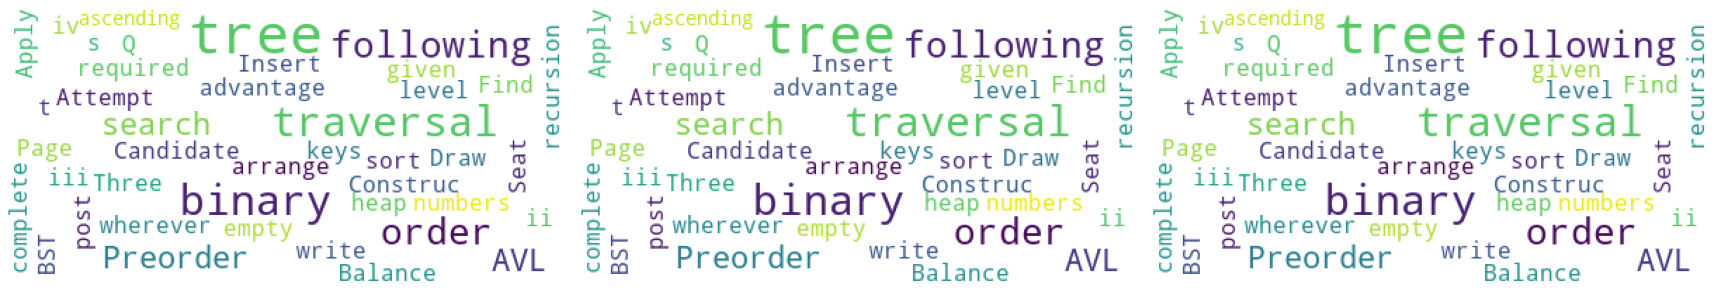

In [101]:
import re
import numpy as np
import string
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
data =text
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(data)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 24))
axes[0].imshow(wordcloud)
axes[0].axis('off')
axes[1].imshow(wordcloud)
axes[1].axis('off')
axes[2].imshow(wordcloud)
axes[2].axis('off')
fig.tight_layout()

*Clean Data*

In [102]:
import re

In [103]:
# remove special characters
text = re.sub('[^A-Za-z0-9]+', ' ', text)

# remove 1 letter words
text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()

# lower all characters
text = text.lower()
text

'candidate seat no page of q attempt the following any three 15 preorder traversal of binary search tree is given below 45 11 23 41 39 85 77 68 96 construc a binary search tree and write down the post order traversal ii what is the advantage of avl tree over bst insert the following keys in an empty avl tree balance the tree wherever required 89 67 55 54 34 33 32 22 12 iii draw the recursion tree for preorder traversal of following binary tree iv find the level order traversal of complete binary tree 3 4 18 11 12 16 10 apply the heap sort to arrange the numbers in ascending order'

*Vocabulary*

In [104]:
words = text.split()
vocab = set(words)

In [105]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

### Implementation

*Dictionaries*

In [106]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

word_to_ix

{'binary': 0,
 'draw': 1,
 'page': 2,
 'avl': 3,
 'down': 4,
 'given': 5,
 'ascending': 6,
 '3': 7,
 '96': 8,
 'write': 9,
 'what': 10,
 '15': 11,
 'required': 12,
 'construc': 13,
 '45': 14,
 '16': 15,
 'following': 16,
 'attempt': 17,
 'heap': 18,
 'to': 19,
 'iv': 20,
 'bst': 21,
 '4': 22,
 'no': 23,
 'keys': 24,
 'is': 25,
 '77': 26,
 'below': 27,
 'an': 28,
 '67': 29,
 'find': 30,
 '12': 31,
 'order': 32,
 '41': 33,
 'complete': 34,
 '39': 35,
 'wherever': 36,
 'over': 37,
 'the': 38,
 '54': 39,
 'a': 40,
 'any': 41,
 'balance': 42,
 '11': 43,
 'seat': 44,
 'preorder': 45,
 '33': 46,
 'sort': 47,
 'q': 48,
 '18': 49,
 '23': 50,
 'recursion': 51,
 'of': 52,
 '22': 53,
 'traversal': 54,
 'candidate': 55,
 'ii': 56,
 '34': 57,
 'three': 58,
 'iii': 59,
 'apply': 60,
 'advantage': 61,
 '32': 62,
 '10': 63,
 '55': 64,
 'empty': 65,
 'search': 66,
 'post': 67,
 'arrange': 68,
 '89': 69,
 '85': 70,
 'numbers': 71,
 'in': 72,
 'insert': 73,
 'level': 74,
 'tree': 75,
 '68': 76,
 'and': 77

*Data Bags*

In [107]:
# data - [(context), target]
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data)

[(['candidate', 'seat', 'page', 'of'], 'no'), (['seat', 'no', 'of', 'q'], 'page'), (['no', 'page', 'q', 'attempt'], 'of'), (['page', 'of', 'attempt', 'the'], 'q'), (['of', 'q', 'the', 'following'], 'attempt'), (['q', 'attempt', 'following', 'any'], 'the'), (['attempt', 'the', 'any', 'three'], 'following'), (['the', 'following', 'three', '15'], 'any'), (['following', 'any', '15', 'preorder'], 'three'), (['any', 'three', 'preorder', 'traversal'], '15'), (['three', '15', 'traversal', 'of'], 'preorder'), (['15', 'preorder', 'of', 'binary'], 'traversal'), (['preorder', 'traversal', 'binary', 'search'], 'of'), (['traversal', 'of', 'search', 'tree'], 'binary'), (['of', 'binary', 'tree', 'is'], 'search'), (['binary', 'search', 'is', 'given'], 'tree'), (['search', 'tree', 'given', 'below'], 'is'), (['tree', 'is', 'below', '45'], 'given'), (['is', 'given', '45', '11'], 'below'), (['given', 'below', '11', '23'], '45'), (['below', '45', '23', '41'], '11'), (['45', '11', '41', '39'], '23'), (['11',

*Embeddings*

In [108]:
import numpy as np
embeddings =  np.random.random_sample((vocab_size, embed_dim))

*Linear*

In [109]:
def linear(m, theta):
    w = theta
    return m.dot(w)

*Log softmax + NLLloss = Cross Entropy*

In [110]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [111]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [112]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]


*Forward Function*

In [113]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

*Backward Function*

In [114]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

*Optimize Function*

In [115]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

### Training

In [116]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

*F1 Score and recall*

In [117]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

### Analyze

Text(0, 0.5, 'Losses')

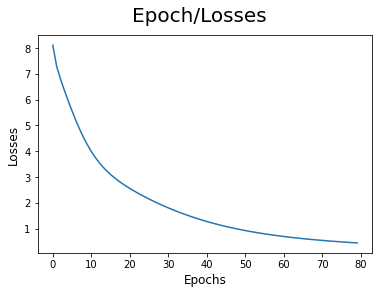

In [118]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

*Predict Function*

In [119]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [120]:
# if:
predict(['recursion', 'tree', 'preorder', 'traversal'])
#     print(word)
# else:


'for'